In [ ]:
## Problem Statement
We want to predict diabetes prevalence based on sugar consumption and other factors using machine learning. Our goal is to build a model that helps public health organizations monitor diabetes risk.

In [7]:

# Step 1: Import the necessary libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# -------------------------------------------------------------------
# Step 2: Load the dataset into a DataFrame
# -------------------------------------------------------------------

df = pd.read_csv('sugar_consumption_dataset.csv')

# Display the first five rows to understand the data
df.head()

,Country,Year,Country_Code,Continent,Region,Population,GDP_Per_Capita,Per_Capita_Sugar_Consumption,Total_Sugar_Consumption,Sugar_From_Sugarcane,...,Obesity_Rate,Sugar_Imports,Sugar_Exports,Avg_Retail_Price_Per_Kg,Gov_Tax,Gov_Subsidies,Education_Campaign,Urbanization_Rate,Climate_Conditions,Sugarcane_Production_Yield
0,France,1972,FRA,Europe,Western Europe,2.617306e+08,8692.631696,12.827741,3.357413e+06,68.422963,...,34.094017,5.401670e+06,2.358929e+06,3.864020,0.0,0,0.0,34.503398,3,52.433972
1,Australia,2003,AUS,Oceania,Australia & New Zealand,1.737965e+08,6859.195960,21.362632,3.712750e+06,55.432564,...,16.040118,3.418790e+06,9.694348e+06,3.282101,0.0,0,0.0,31.783067,4,58.382055
2,Germany,1963,DEU,Europe,Western Europe,1.236366e+08,22075.950575,32.077485,3.965951e+06,86.466120,...,14.405741,8.987281e+06,5.451632e+06,1.097687,0.0,0,0.0,51.551345,1,32.184735
3,France,1965,FRA,Europe,Western Europe,2.989961e+08,3728.027392,47.648930,1.424685e+07,69.806707,...,38.499271,5.179004e+06,8.048500e+06,2.761297,0.0,0,0.0,80.386281,2,84.296019
4,Germany,2010,DEU,Europe,Western Europe,7.341531e+06,40420.973962,23.214343,1.704288e+05,63.772278,...,36.190977,6.463439e+06,7.062910e+06,4.219431,0.0,0,1.0,49.701153,3,66.110815


In [11]:
# Step 3: Understand the structure of the dataset
# Check the shape of the dataset
df.shape

(10000, 26)

In [13]:
# View the column names to understand what features are available

df.columns

Index(['Country', 'Year', 'Country_Code', 'Continent', 'Region', 'Population',
       'GDP_Per_Capita', 'Per_Capita_Sugar_Consumption',
       'Total_Sugar_Consumption', 'Sugar_From_Sugarcane', 'Sugar_From_Beet',
       'Sugar_From_HFCS', 'Sugar_From_Other', 'Processed_Food_Consumption',
       'Avg_Daily_Sugar_Intake', 'Diabetes_Prevalence', 'Obesity_Rate',
       'Sugar_Imports', 'Sugar_Exports', 'Avg_Retail_Price_Per_Kg', 'Gov_Tax',
       'Gov_Subsidies', 'Education_Campaign', 'Urbanization_Rate',
       'Climate_Conditions', 'Sugarcane_Production_Yield'],
      dtype='object')

In [19]:
# Check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       10000 non-null  object 
 1   Year                          10000 non-null  int64  
 2   Country_Code                  10000 non-null  object 
 3   Continent                     10000 non-null  object 
 4   Region                        10000 non-null  object 
 5   Population                    10000 non-null  float64
 6   GDP_Per_Capita                10000 non-null  float64
 7   Per_Capita_Sugar_Consumption  10000 non-null  float64
 8   Total_Sugar_Consumption       10000 non-null  float64
 9   Sugar_From_Sugarcane          10000 non-null  float64
 10  Sugar_From_Beet               10000 non-null  float64
 11  Sugar_From_HFCS               10000 non-null  float64
 12  Sugar_From_Other              10000 non-null  float64
 13  Pr

In [21]:
# Generate summary statistics for numerical features
df.describe()

,Year,Population,GDP_Per_Capita,Per_Capita_Sugar_Consumption,Total_Sugar_Consumption,Sugar_From_Sugarcane,Sugar_From_Beet,Sugar_From_HFCS,Sugar_From_Other,Processed_Food_Consumption,...,Obesity_Rate,Sugar_Imports,Sugar_Exports,Avg_Retail_Price_Per_Kg,Gov_Tax,Gov_Subsidies,Education_Campaign,Urbanization_Rate,Climate_Conditions,Sugarcane_Production_Yield
count,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,1.000000e+04,1.000000e+04,10000.000000,9469.000000,10000.000000,9480.000000,10000.000000,10000.000000,10000.000000
mean,1991.330300,1.501189e+08,25242.491756,37.626027,5.650157e+06,70.028543,22.494559,29.811113,-22.334215,155.294166,...,22.355718,5.040963e+06,5.077761e+06,2.747125,0.150914,0.297500,0.406962,49.973144,2.977100,65.251931
std,18.424086,8.646170e+07,14193.053646,18.733654,4.599203e+06,11.481251,10.207287,17.242892,22.988417,83.677159,...,10.090557,2.890586e+06,2.886414e+06,1.302997,0.357983,0.457181,0.491294,23.185861,1.415831,20.185192
min,1960.000000,1.005004e+06,500.417394,5.017558,7.387572e+03,50.005200,5.003532,0.001761,-84.188301,10.028391,...,5.001991,3.658518e+02,1.577075e+02,0.500030,0.000000,0.000000,0.000000,10.018786,1.000000,30.002468
25%,1976.000000,7.434980e+07,13219.345523,21.386174,1.882590e+06,60.072363,13.544087,14.746013,-38.633165,81.785601,...,13.698372,2.509690e+06,2.570209e+06,1.620856,0.000000,0.000000,0.000000,29.374395,2.000000,47.375830
50%,1991.000000,1.500741e+08,25155.568950,37.878147,4.369083e+06,70.167342,22.532868,30.101299,-22.413240,155.910019,...,22.258420,5.064198e+06,5.103455e+06,2.736859,0.000000,0.000000,0.000000,50.201101,3.000000,65.571891
75%,2007.000000,2.250870e+08,37558.130715,54.003484,8.484738e+06,80.007973,31.448762,44.571011,-5.925863,228.076059,...,31.006182,7.552546e+06,7.606691e+06,3.872086,0.000000,1.000000,1.000000,70.072238,4.000000,82.512623
max,2023.000000,2.999917e+08,49997.014954,69.991881,2.090366e+07,89.994688,39.999721,59.998558,40.710226,299.934874,...,39.997246,9.999894e+06,9.999107e+06,4.999483,1.000000,1.000000,1.000000,89.998222,5.000000,99.993296


In [23]:
# Count missing values in each column
df.isnull().sum()

Country                           0
Year                              0
Country_Code                      0
Continent                         0
Region                            0
Population                        0
GDP_Per_Capita                    0
Per_Capita_Sugar_Consumption      0
Total_Sugar_Consumption           0
Sugar_From_Sugarcane              0
Sugar_From_Beet                   0
Sugar_From_HFCS                   0
Sugar_From_Other                  0
Processed_Food_Consumption        0
Avg_Daily_Sugar_Intake            0
Diabetes_Prevalence               0
Obesity_Rate                      0
Sugar_Imports                     0
Sugar_Exports                     0
Avg_Retail_Price_Per_Kg           0
Gov_Tax                         531
Gov_Subsidies                     0
Education_Campaign              520
Urbanization_Rate                 0
Climate_Conditions                0
Sugarcane_Production_Yield        0
dtype: int64

In [27]:
df = df.dropna()

In [31]:
print(df.columns)

Index(['Country', 'Year', 'Country_Code', 'Continent', 'Region', 'Population',
       'GDP_Per_Capita', 'Per_Capita_Sugar_Consumption',
       'Total_Sugar_Consumption', 'Sugar_From_Sugarcane', 'Sugar_From_Beet',
       'Sugar_From_HFCS', 'Sugar_From_Other', 'Processed_Food_Consumption',
       'Avg_Daily_Sugar_Intake', 'Diabetes_Prevalence', 'Obesity_Rate',
       'Sugar_Imports', 'Sugar_Exports', 'Avg_Retail_Price_Per_Kg', 'Gov_Tax',
       'Gov_Subsidies', 'Education_Campaign', 'Urbanization_Rate',
       'Climate_Conditions', 'Sugarcane_Production_Yield'],
      dtype='object')


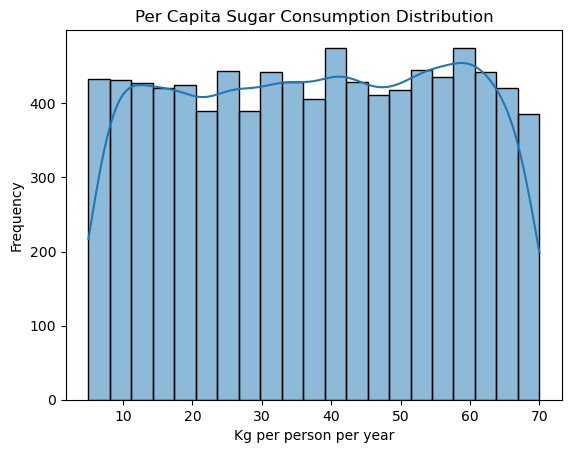

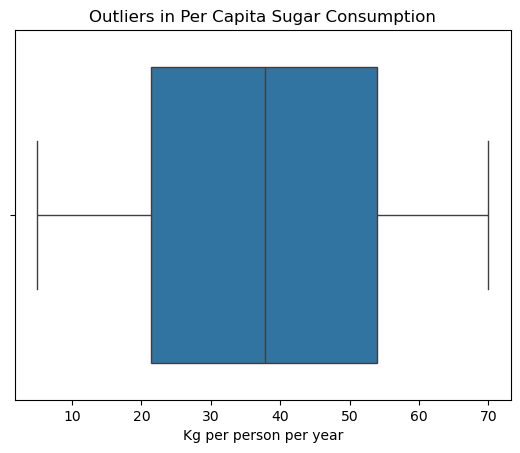

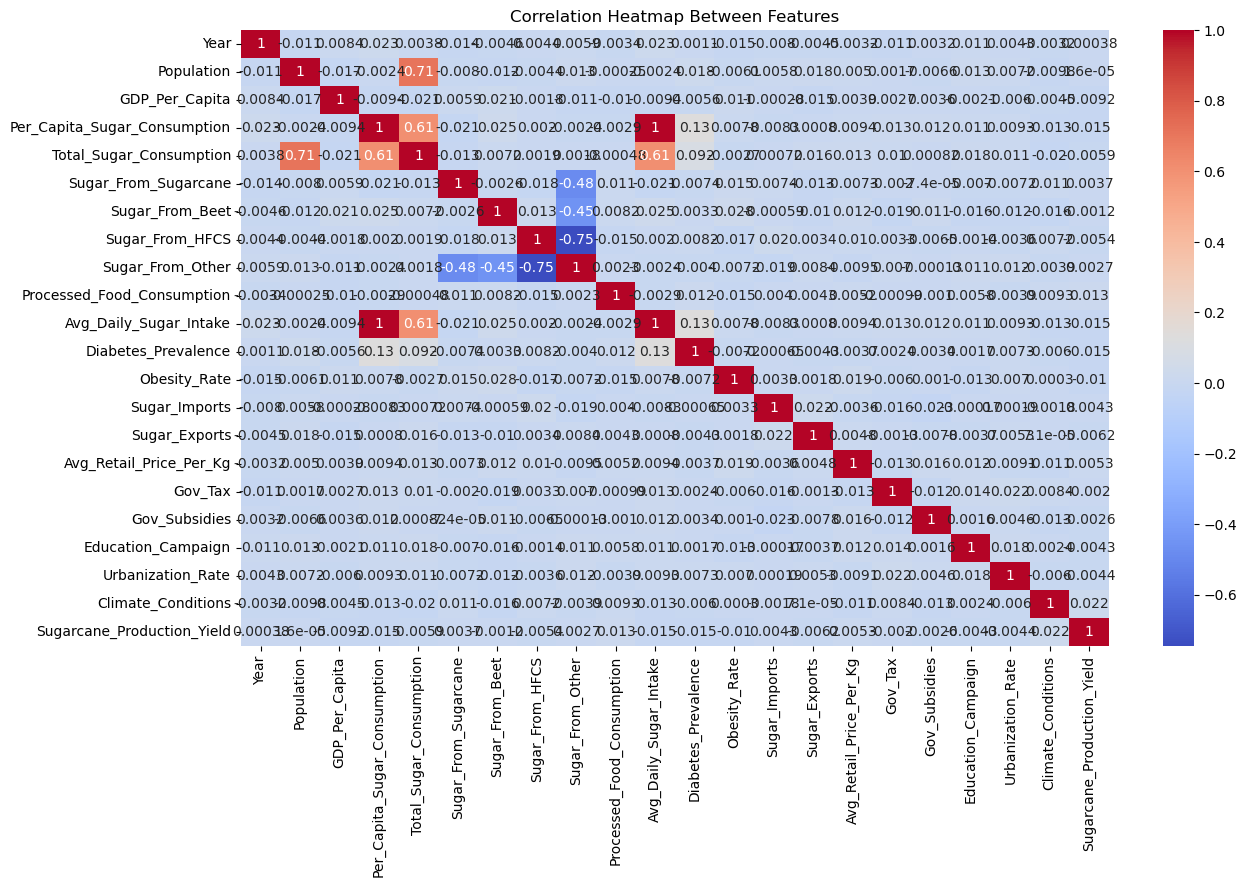

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Per Capita Sugar Consumption
sns.histplot(df['Per_Capita_Sugar_Consumption'], kde=True)
plt.title("Per Capita Sugar Consumption Distribution")
plt.xlabel("Kg per person per year")
plt.ylabel("Frequency")
plt.show()

# Boxplot to detect outliers
sns.boxplot(x=df['Per_Capita_Sugar_Consumption'])
plt.title("Outliers in Per Capita Sugar Consumption")
plt.xlabel("Kg per person per year")
plt.show()

# Correlation heatmap
plt.figure(figsize=(14,8))
numeric_df = df.select_dtypes(include=['number'])  # keeps only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap Between Features")
plt.show()

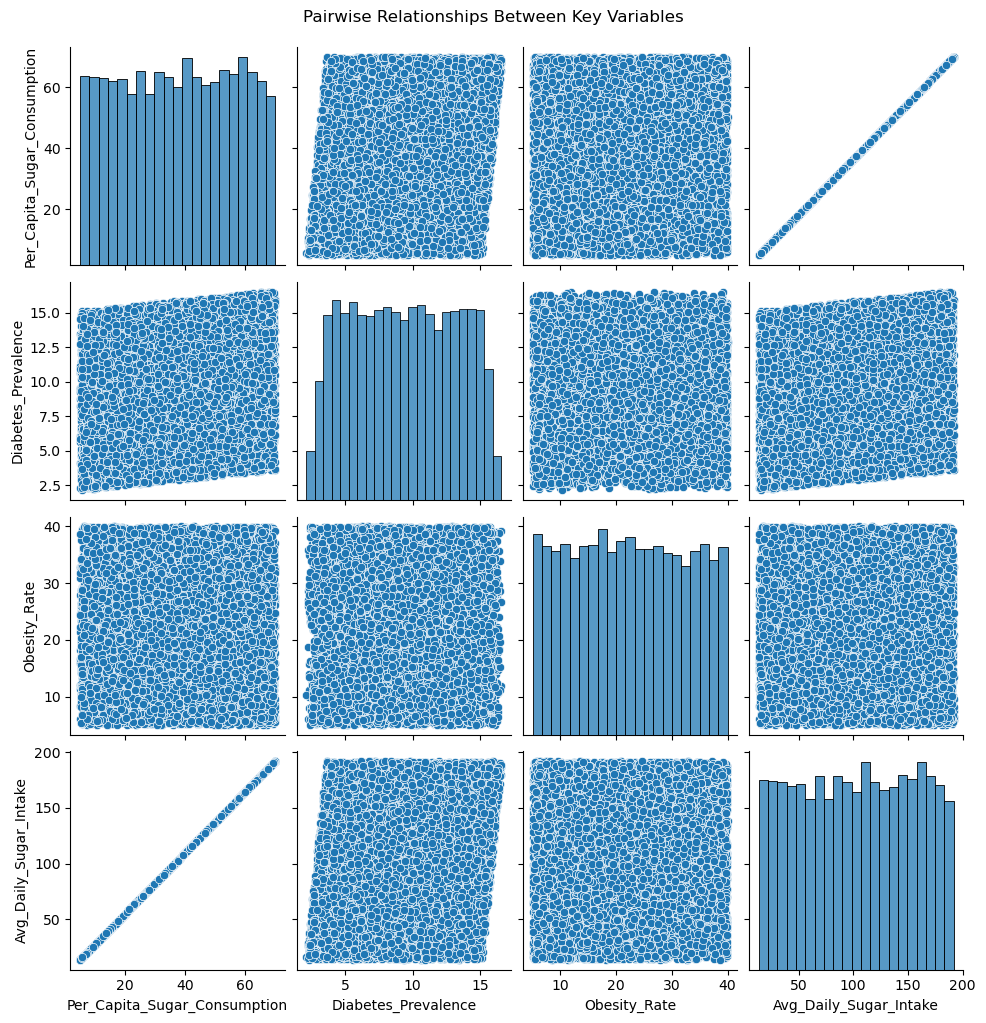

In [37]:
# Pairplot for selected features
selected = df[['Per_Capita_Sugar_Consumption', 'Diabetes_Prevalence', 'Obesity_Rate', 'Avg_Daily_Sugar_Intake']]
sns.pairplot(selected)
plt.suptitle("Pairwise Relationships Between Key Variables", y=1.02)
plt.show()

In [39]:
# View which columns have missing values and how many
missing_counts = df.isnull().sum()
missing_counts[missing_counts > 0]

Series([], dtype: int64)

In [41]:
# Check the data types of the columns with missing values
df[['Gov_Tax', 'Education_Campaign']].dtypes

Gov_Tax               float64
Education_Campaign    float64
dtype: object

In [43]:
# Fill missing numerical values with the mean

df['Gov_Tax'] = df['Gov_Tax'].fillna(df['Gov_Tax'].mean())
df['Education_Campaign'] = df['Education_Campaign'].fillna(df['Education_Campaign'].mean())

In [45]:
# Re-check to confirm no missing values remain
df.isnull().sum()

Country                         0
Year                            0
Country_Code                    0
Continent                       0
Region                          0
Population                      0
GDP_Per_Capita                  0
Per_Capita_Sugar_Consumption    0
Total_Sugar_Consumption         0
Sugar_From_Sugarcane            0
Sugar_From_Beet                 0
Sugar_From_HFCS                 0
Sugar_From_Other                0
Processed_Food_Consumption      0
Avg_Daily_Sugar_Intake          0
Diabetes_Prevalence             0
Obesity_Rate                    0
Sugar_Imports                   0
Sugar_Exports                   0
Avg_Retail_Price_Per_Kg         0
Gov_Tax                         0
Gov_Subsidies                   0
Education_Campaign              0
Urbanization_Rate               0
Climate_Conditions              0
Sugarcane_Production_Yield      0
dtype: int64

In [23]:
# Separate numerical and categorical features

df.dtypes

Country                          object
Year                              int64
Country_Code                     object
Continent                        object
Region                           object
Population                      float64
GDP_Per_Capita                  float64
Per_Capita_Sugar_Consumption    float64
Total_Sugar_Consumption         float64
Sugar_From_Sugarcane            float64
Sugar_From_Beet                 float64
Sugar_From_HFCS                 float64
Sugar_From_Other                float64
Processed_Food_Consumption      float64
Avg_Daily_Sugar_Intake          float64
Diabetes_Prevalence             float64
Obesity_Rate                    float64
Sugar_Imports                   float64
Sugar_Exports                   float64
Avg_Retail_Price_Per_Kg         float64
Gov_Tax                         float64
Gov_Subsidies                     int64
Education_Campaign              float64
Urbanization_Rate               float64
Climate_Conditions                int64


In [25]:
# Analyze 'Continent' feature
df['Continent'].value_counts()

Continent
Asia             3349
Europe           2510
North America    1620
Oceania           917
Africa            816
South America     788
Name: count, dtype: int64

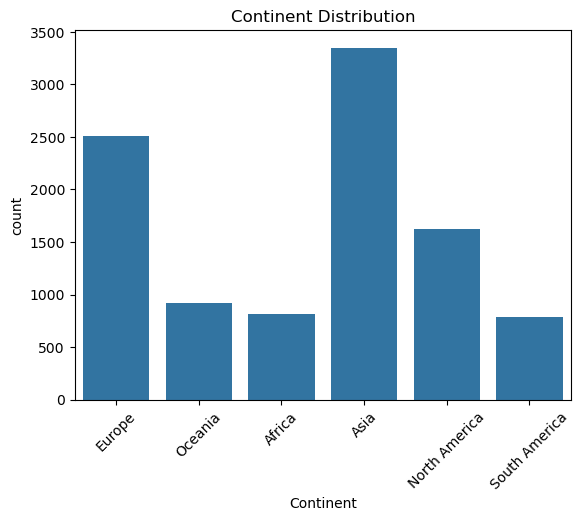

In [27]:
# Plot the distribution of 'Continent'
sns.countplot(data=df, x='Continent')
plt.title('Continent Distribution')
plt.xticks(rotation=45)
plt.show()

In [47]:
# Analyze 'Region' feature
df['Region'].value_counts()

Region
Western Europe             1525
East Asia                  1472
Australia & New Zealand     842
Southeast Asia              798
South Asia                  749
Eastern Europe              729
Central America             725
Sub-Saharan Africa          723
South America               712
Northern America            699
Name: count, dtype: int64

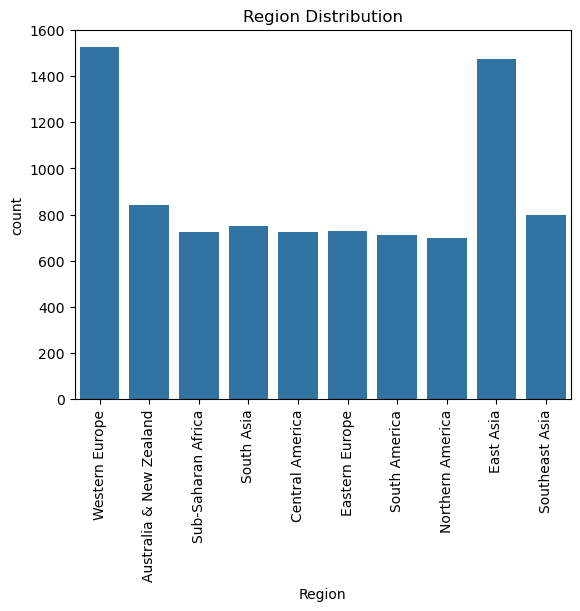

In [49]:
# Plot the distribution of 'Region'
sns.countplot(data=df, x='Region')
plt.title('Region Distribution')
plt.xticks(rotation=90)
plt.show()

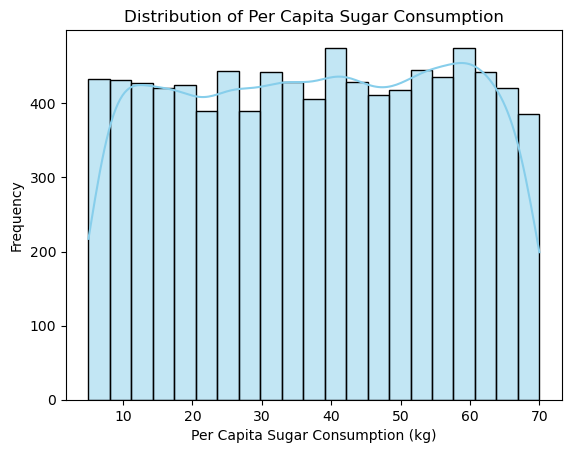

In [51]:
# Plot histogram and KDE for 'Per_Capita_Sugar_Consumption'

sns.histplot(df['Per_Capita_Sugar_Consumption'], kde=True, color='skyblue')
plt.title('Distribution of Per Capita Sugar Consumption')
plt.xlabel('Per Capita Sugar Consumption (kg)')
plt.ylabel('Frequency')
plt.show()

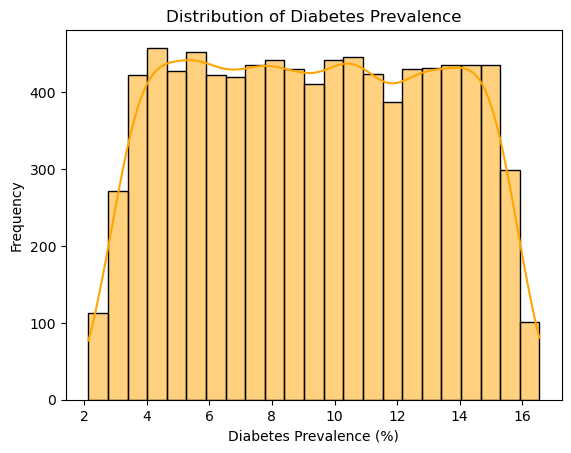

In [53]:
# Plot histogram and KDE for 'Diabetes_Prevalence'

sns.histplot(df['Diabetes_Prevalence'], kde=True, color='orange')
plt.title('Distribution of Diabetes Prevalence')
plt.xlabel('Diabetes Prevalence (%)')
plt.ylabel('Frequency')
plt.show()

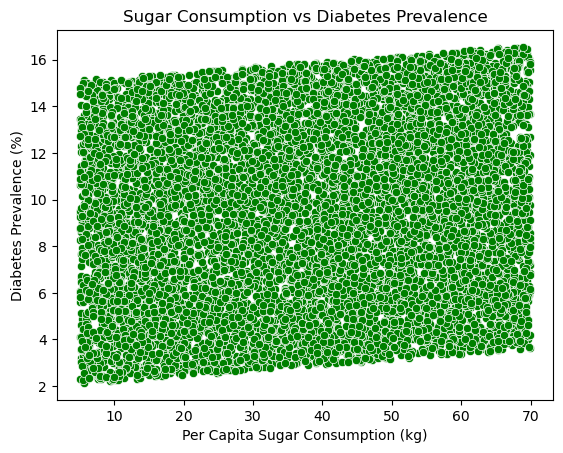

In [55]:
# Scatter plot between 'Per_Capita_Sugar_Consumption' and 'Diabetes_Prevalence'

sns.scatterplot(data=df, x='Per_Capita_Sugar_Consumption', y='Diabetes_Prevalence', color='green')
plt.title('Sugar Consumption vs Diabetes Prevalence')
plt.xlabel('Per Capita Sugar Consumption (kg)')
plt.ylabel('Diabetes Prevalence (%)')
plt.show()

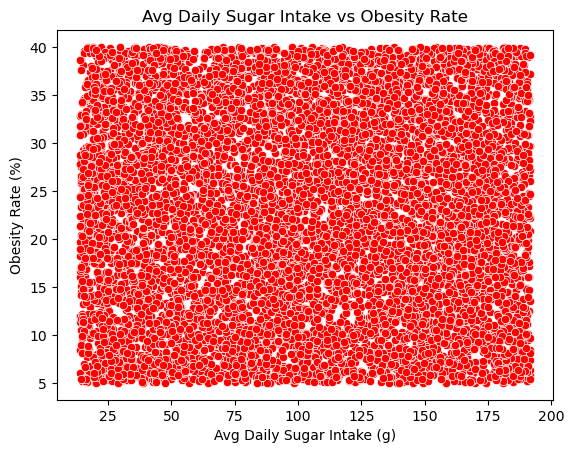

In [57]:
# Scatter plot between 'Avg_Daily_Sugar_Intake' and 'Obesity_Rate'

sns.scatterplot(data=df, x='Avg_Daily_Sugar_Intake', y='Obesity_Rate', color='red')
plt.title('Avg Daily Sugar Intake vs Obesity Rate')
plt.xlabel('Avg Daily Sugar Intake (g)')
plt.ylabel('Obesity Rate (%)')
plt.show()

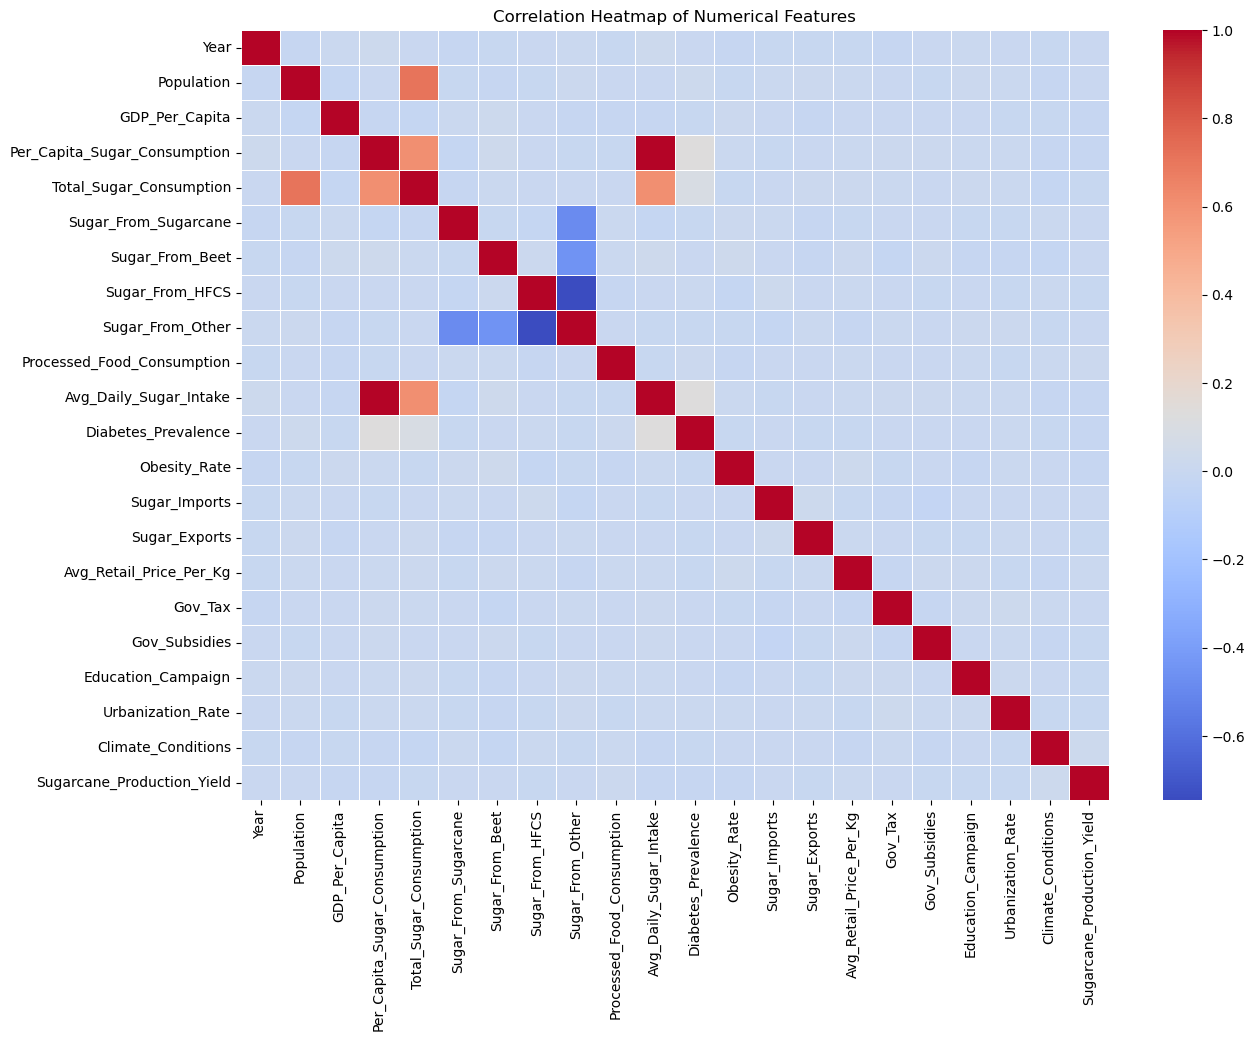

In [59]:
# Select numerical features for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [61]:
#Create new feature - Sugar Import/Export Ratio

df['Sugar_Import_Export_Ratio'] = df['Sugar_Imports'] / (df['Sugar_Exports'] + 1)

In [63]:
# Display the first few values of the new feature
df[['Sugar_Imports', 'Sugar_Exports', 'Sugar_Import_Export_Ratio']].head()

,Sugar_Imports,Sugar_Exports,Sugar_Import_Export_Ratio
0,5.401670e+06,2.358929e+06,2.289881
1,3.418790e+06,9.694348e+06,0.352658
2,8.987281e+06,5.451632e+06,1.648548
3,5.179004e+06,8.048500e+06,0.643474
4,6.463439e+06,7.062910e+06,0.915124


In [65]:
#Feature Selection using correlation

# Compute correlation with the target (Diabetes_Prevalence)
correlation_with_target = numeric_df.corr()['Diabetes_Prevalence'].sort_values(ascending=False)

# Display top correlated features
correlation_with_target

Diabetes_Prevalence             1.000000
Per_Capita_Sugar_Consumption    0.127517
Avg_Daily_Sugar_Intake          0.127517
Total_Sugar_Consumption         0.092125
Population                      0.018078
Processed_Food_Consumption      0.011701
Sugar_From_HFCS                 0.008222
Urbanization_Rate               0.007345
Gov_Subsidies                   0.003355
Sugar_From_Beet                 0.003332
Gov_Tax                         0.002361
Education_Campaign              0.001674
Year                            0.001069
Sugar_Imports                  -0.000650
Avg_Retail_Price_Per_Kg        -0.003676
Sugar_From_Other               -0.003960
Sugar_Exports                  -0.004301
GDP_Per_Capita                 -0.005633
Climate_Conditions             -0.006022
Obesity_Rate                   -0.007232
Sugar_From_Sugarcane           -0.007353
Sugarcane_Production_Yield     -0.015210
Name: Diabetes_Prevalence, dtype: float64

In [67]:
# select features and define X and y
features = [
    'Avg_Daily_Sugar_Intake',
    'Per_Capita_Sugar_Consumption',
    'Total_Sugar_Consumption',
    'Sugar_Import_Export_Ratio'  # newly engineered feature
]

X = df[features]
y = df['Diabetes_Prevalence']

In [69]:
#Split the data into training and testing sets

from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Model 1: Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
lr_preds = lr_model.predict(X_test)

# Evaluation
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("MSE:", mean_squared_error(y_test, lr_preds))
print("R2 Score:", r2_score(y_test, lr_preds))

Linear Regression Performance:
MAE: 3.322436015837935
MSE: 14.590183784168241
R2 Score: 0.013634416355048806


In [73]:
# Model 2: Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict
tree_preds = tree_model.predict(X_test)

# Evaluation
print("Decision Tree Performance:")
print("MAE:", mean_absolute_error(y_test, tree_preds))
print("MSE:", mean_squared_error(y_test, tree_preds))
print("R2 Score:", r2_score(y_test, tree_preds))

Decision Tree Performance:
MAE: 4.38309761356008
MSE: 28.79352806898808
R2 Score: -0.9465789834520442


In [75]:
# Model 3: Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluation
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R2 Score:", r2_score(y_test, rf_preds))

Random Forest Performance:
MAE: 3.4441612599566693
MSE: 16.23916860661729
R2 Score: -0.09784477409774972


In [77]:
#Tune the Random Forest Regressor using GridSearchCV

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [78]:
# Best parameters
print("Best parameters found:", grid_search.best_params_)

# Best model
best_rf = grid_search.best_estimator_

# Predict using best model
best_preds = best_rf.predict(X_test)

# Evaluation
print("Tuned Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, best_preds))
print("MSE:", mean_squared_error(y_test, best_preds))
print("R2 Score:", r2_score(y_test, best_preds))

Best parameters found: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Random Forest Performance:
MAE: 3.3281973332705763
MSE: 14.672259470041618
R2 Score: 0.008085710937958845


In [81]:
best_preds = best_rf.predict(X_test)

In [83]:
print("Final Evaluation Metrics:")
print("MAE:", mean_absolute_error(y_test, best_preds))
print("MSE:", mean_squared_error(y_test, best_preds))
print("R2 Score:", r2_score(y_test, best_preds))

Final Evaluation Metrics:
MAE: 3.3281973332705763
MSE: 14.672259470041618
R2 Score: 0.008085710937958845


In [85]:
# Save the best model using joblib

import joblib

# Save model
joblib.dump(best_rf, 'diabetes_model.pkl')

['diabetes_model.pkl']